# Complete Process
- Data loading
- Basic Metadata Check (shape, info, dtypes, describe)
- Data cleaning
  - Finding missing percentage in each column and dropping them based on the predetermined threshold
  - Removing missing values and replacing them with appropriate data
  - Standardizing data
- Handling Outliers
- Analysis
  - Identifying Continuous and Categorical Elements
  - Analyse key features
- Univariate Analysis
- Segmented Univariate Analysis
  - Identifying Data Imbalance (This will be performed for the Target column only)
  - Segmented Univariate Analysis
    - Univariate Analysis on Segmented Data
    - Data visualisation using various graphs
    - Perform Univariate Analysis on two subsets -- Defaulters (1) and Non-Defaulters (0)
    - Compare analysis on both
- Bivariate Analysis
- Draw top 10 correlation heat maps and gather insights from it

## Data Loading 

In [1]:
#import warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
# import the useful libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option("display.max_rows", 500)

In [3]:
inp0= pd.read_csv (r'C:\Users\pragya.bhargava\Downloads\application_data.csv')
inp1= pd.read_csv (r'C:\Users\pragya.bhargava\Downloads\previous_application.csv')

## Metadata Check

In [4]:
inp0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [5]:
inp0.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


In [6]:
inp0.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
inp0.dtypes

SK_ID_CURR                        int64
TARGET                            int64
NAME_CONTRACT_TYPE               object
CODE_GENDER                      object
FLAG_OWN_CAR                     object
FLAG_OWN_REALTY                  object
CNT_CHILDREN                      int64
AMT_INCOME_TOTAL                float64
AMT_CREDIT                      float64
AMT_ANNUITY                     float64
AMT_GOODS_PRICE                 float64
NAME_TYPE_SUITE                  object
NAME_INCOME_TYPE                 object
NAME_EDUCATION_TYPE              object
NAME_FAMILY_STATUS               object
NAME_HOUSING_TYPE                object
REGION_POPULATION_RELATIVE      float64
DAYS_BIRTH                        int64
DAYS_EMPLOYED                     int64
DAYS_REGISTRATION               float64
DAYS_ID_PUBLISH                   int64
OWN_CAR_AGE                     float64
FLAG_MOBIL                        int64
FLAG_EMP_PHONE                    int64
FLAG_WORK_PHONE                   int64


## Data Cleaning
- Fixing Rows and columns
- Missing value treatment
- Standardizing Values

### Fixing Rows and Columns
Dropping columns that are not relevant to the dataset

In [8]:
inp0.drop(inp0.iloc[:, 44:91], inplace = True, axis = 1)

In [9]:
inp0.shape

(307511, 75)

### Missing Value Treatment
Finding missing value percentage in each column and dropping them based on predetermined threshold 

In [10]:
inp0.isnull().sum()

SK_ID_CURR                          0
TARGET                              0
NAME_CONTRACT_TYPE                  0
CODE_GENDER                         0
FLAG_OWN_CAR                        0
FLAG_OWN_REALTY                     0
CNT_CHILDREN                        0
AMT_INCOME_TOTAL                    0
AMT_CREDIT                          0
AMT_ANNUITY                        12
AMT_GOODS_PRICE                   278
NAME_TYPE_SUITE                  1292
NAME_INCOME_TYPE                    0
NAME_EDUCATION_TYPE                 0
NAME_FAMILY_STATUS                  0
NAME_HOUSING_TYPE                   0
REGION_POPULATION_RELATIVE          0
DAYS_BIRTH                          0
DAYS_EMPLOYED                       0
DAYS_REGISTRATION                   0
DAYS_ID_PUBLISH                     0
OWN_CAR_AGE                    202929
FLAG_MOBIL                          0
FLAG_EMP_PHONE                      0
FLAG_WORK_PHONE                     0
FLAG_CONT_MOBILE                    0
FLAG_PHONE  

In [11]:
inp0_missing = 100*inp0.isnull().mean()
inp0_missing

SK_ID_CURR                      0.000000
TARGET                          0.000000
NAME_CONTRACT_TYPE              0.000000
CODE_GENDER                     0.000000
FLAG_OWN_CAR                    0.000000
FLAG_OWN_REALTY                 0.000000
CNT_CHILDREN                    0.000000
AMT_INCOME_TOTAL                0.000000
AMT_CREDIT                      0.000000
AMT_ANNUITY                     0.003902
AMT_GOODS_PRICE                 0.090403
NAME_TYPE_SUITE                 0.420148
NAME_INCOME_TYPE                0.000000
NAME_EDUCATION_TYPE             0.000000
NAME_FAMILY_STATUS              0.000000
NAME_HOUSING_TYPE               0.000000
REGION_POPULATION_RELATIVE      0.000000
DAYS_BIRTH                      0.000000
DAYS_EMPLOYED                   0.000000
DAYS_REGISTRATION               0.000000
DAYS_ID_PUBLISH                 0.000000
OWN_CAR_AGE                    65.990810
FLAG_MOBIL                      0.000000
FLAG_EMP_PHONE                  0.000000
FLAG_WORK_PHONE 

In [12]:
inp0_missing.sort_values(ascending = False)

OWN_CAR_AGE                    65.990810
EXT_SOURCE_1                   56.381073
OCCUPATION_TYPE                31.345545
EXT_SOURCE_3                   19.825307
AMT_REQ_CREDIT_BUREAU_YEAR     13.501631
AMT_REQ_CREDIT_BUREAU_QRT      13.501631
AMT_REQ_CREDIT_BUREAU_MON      13.501631
AMT_REQ_CREDIT_BUREAU_WEEK     13.501631
AMT_REQ_CREDIT_BUREAU_DAY      13.501631
AMT_REQ_CREDIT_BUREAU_HOUR     13.501631
NAME_TYPE_SUITE                 0.420148
OBS_30_CNT_SOCIAL_CIRCLE        0.332021
DEF_30_CNT_SOCIAL_CIRCLE        0.332021
OBS_60_CNT_SOCIAL_CIRCLE        0.332021
DEF_60_CNT_SOCIAL_CIRCLE        0.332021
EXT_SOURCE_2                    0.214626
AMT_GOODS_PRICE                 0.090403
AMT_ANNUITY                     0.003902
CNT_FAM_MEMBERS                 0.000650
DAYS_LAST_PHONE_CHANGE          0.000325
FLAG_DOCUMENT_15                0.000000
FLAG_DOCUMENT_14                0.000000
FLAG_DOCUMENT_21                0.000000
FLAG_DOCUMENT_20                0.000000
FLAG_DOCUMENT_19

In [13]:
application_data = inp0.loc[:, inp0_missing<50]
application_data

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
application_data.shape

(307511, 73)

In [15]:
100*application_data.isnull().mean()

SK_ID_CURR                      0.000000
TARGET                          0.000000
NAME_CONTRACT_TYPE              0.000000
CODE_GENDER                     0.000000
FLAG_OWN_CAR                    0.000000
FLAG_OWN_REALTY                 0.000000
CNT_CHILDREN                    0.000000
AMT_INCOME_TOTAL                0.000000
AMT_CREDIT                      0.000000
AMT_ANNUITY                     0.003902
AMT_GOODS_PRICE                 0.090403
NAME_TYPE_SUITE                 0.420148
NAME_INCOME_TYPE                0.000000
NAME_EDUCATION_TYPE             0.000000
NAME_FAMILY_STATUS              0.000000
NAME_HOUSING_TYPE               0.000000
REGION_POPULATION_RELATIVE      0.000000
DAYS_BIRTH                      0.000000
DAYS_EMPLOYED                   0.000000
DAYS_REGISTRATION               0.000000
DAYS_ID_PUBLISH                 0.000000
FLAG_MOBIL                      0.000000
FLAG_EMP_PHONE                  0.000000
FLAG_WORK_PHONE                 0.000000
FLAG_CONT_MOBILE

#### Here we have removed the irrelevant columns and columns where the percentage of missing value exceeded 50% 

#### Now we will proceed to remove/impute the missing values in the data above

In [16]:
#Identifying categories in each column that has missing values
application_data.dtypes

SK_ID_CURR                       int64
TARGET                           int64
NAME_CONTRACT_TYPE              object
CODE_GENDER                     object
FLAG_OWN_CAR                    object
FLAG_OWN_REALTY                 object
CNT_CHILDREN                     int64
AMT_INCOME_TOTAL               float64
AMT_CREDIT                     float64
AMT_ANNUITY                    float64
AMT_GOODS_PRICE                float64
NAME_TYPE_SUITE                 object
NAME_INCOME_TYPE                object
NAME_EDUCATION_TYPE             object
NAME_FAMILY_STATUS              object
NAME_HOUSING_TYPE               object
REGION_POPULATION_RELATIVE     float64
DAYS_BIRTH                       int64
DAYS_EMPLOYED                    int64
DAYS_REGISTRATION              float64
DAYS_ID_PUBLISH                  int64
FLAG_MOBIL                       int64
FLAG_EMP_PHONE                   int64
FLAG_WORK_PHONE                  int64
FLAG_CONT_MOBILE                 int64
FLAG_PHONE               

#### Identified columns that have missing values are:
- AMT_ANNUITY
- AMT_GOODS_PRICE
- NAME_TYPE_SUITE
- OCCUPATION_TYPE
- CNT_FAM_MEMBERS
- EXT_SOURCE_2
- EXT_SOURCE_3
- OBS_30_CNT_SOCIAL_CIRCLE
- DEF_30_CNT_SOCIAL_CIRCLE
- OBS_60_CNT_SOCIAL_CIRCLE
- DEF_60_CNT_SOCIAL_CIRCLE
- DAYS_LAST_PHONE_CHANGE
- AMT_REQ_CREDIT_BUREAU_HOUR
- AMT_REQ_CREDIT_BUREAU_DAY
- AMT_REQ_CREDIT_BUREAU_WEEK
- AMT_REQ_CREDIT_BUREAU_MON
- AMT_REQ_CREDIT_BUREAU_QRT
- AMT_REQ_CREDIT_BUREAU_YEAR

For columns that have numerical values, we will use the describe syntax and visualise the values using a boxplot to find out any outliers. Then, the missing cell in the data will be replaced by the median of the values in that column if there is a clear outlier in the data. Otherwise it will be replaced by the mean of all values.

For columns that have object values, if the percentage of missing value is relatively significant, we will be adding another category for missing values. Else, based on the relevance and the meaning of the missing value, the missing value will be dropped and be imputed based on the relevant data categories in a column.

In [17]:
#Columns with numerical values
#AMT_ANNUITY

In [18]:
application_data.AMT_ANNUITY.describe()

count    307499.000000
mean      27108.573909
std       14493.737315
min        1615.500000
25%       16524.000000
50%       24903.000000
75%       34596.000000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64

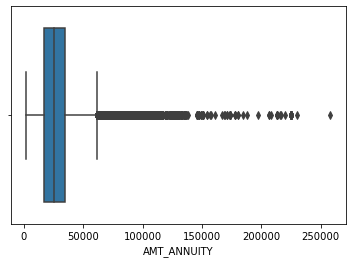

In [19]:
sns.boxplot(application_data.AMT_ANNUITY)
plt.show()

In [20]:
#replacing value of the missing values by median value i.e. 24903
application_data.AMT_ANNUITY=application_data.AMT_ANNUITY.fillna(application_data.AMT_ANNUITY.median())

In [21]:
#CNT_FAM_MEMBERS
#Since the missing values in this column is very less, it can be dropped
application_data=application_data[~application_data.CNT_FAM_MEMBERS.isnull()]

In [22]:
#DAYS_LAST_PHONE_CHANGE
#Since the missing values in this column is very less, it can be dropped
application_data=application_data[~application_data.DAYS_LAST_PHONE_CHANGE.isnull()]

In [23]:
#AMT_GOODS_PRICE
application_data.AMT_GOODS_PRICE.describe()

count    3.072320e+05
mean     5.383971e+05
std      3.694467e+05
min      4.050000e+04
25%      2.385000e+05
50%      4.500000e+05
75%      6.795000e+05
max      4.050000e+06
Name: AMT_GOODS_PRICE, dtype: float64

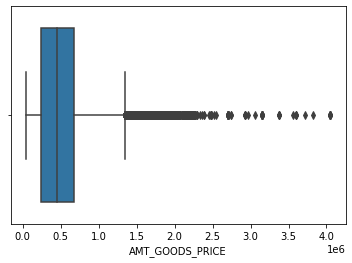

In [24]:
sns.boxplot(application_data.AMT_GOODS_PRICE)
plt.show()

In [25]:
#replacing value of the missing values by median value i.e. 4.5
application_data.AMT_GOODS_PRICE=application_data.AMT_GOODS_PRICE.fillna(application_data.AMT_GOODS_PRICE.median())

In [26]:
#EXT_SOURCE_2
application_data[["EXT_SOURCE_2","EXT_SOURCE_3"]].describe()

,EXT_SOURCE_2,EXT_SOURCE_3
count,3.068490e+05,246545.000000
mean,5.143916e-01,0.510852
std,1.910603e-01,0.194844
min,8.173617e-08,0.000527
25%,3.924574e-01,0.370650
50%,5.659614e-01,0.535276
75%,6.636171e-01,0.669057
max,8.549997e-01,0.896010


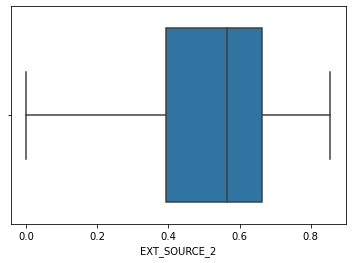

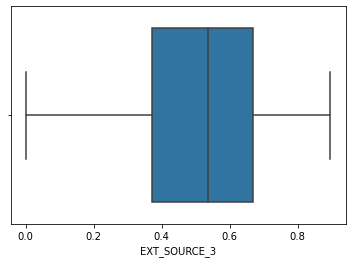

In [27]:
sns.boxplot(application_data.EXT_SOURCE_2)
plt.show()

sns.boxplot(application_data.EXT_SOURCE_3)
plt.show()

In [28]:
#replacing value of the missing values by mean values i.e. 5.14 and 0.51 respectively for column EXT_SOURCE_2 and EXT_SOURCE_3 
application_data.EXT_SOURCE_2=application_data.EXT_SOURCE_2.fillna(application_data.EXT_SOURCE_2.mean())
application_data.EXT_SOURCE_3=application_data.EXT_SOURCE_3.fillna(application_data.EXT_SOURCE_3.mean())

In [29]:
#Client Social Circle
application_data[["OBS_30_CNT_SOCIAL_CIRCLE", "DEF_30_CNT_SOCIAL_CIRCLE", "OBS_60_CNT_SOCIAL_CIRCLE", "DEF_60_CNT_SOCIAL_CIRCLE"]].describe()

,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE
count,306487.000000,306487.000000,306487.000000,306487.000000
mean,1.422246,0.143422,1.405293,0.100050
std,2.400997,0.446700,2.379812,0.362292
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000
75%,2.000000,0.000000,2.000000,0.000000
max,348.000000,34.000000,344.000000,24.000000


In [30]:
#replacing value of the missing values by median values due to clear outliers in all mentioned columns
application_data.OBS_30_CNT_SOCIAL_CIRCLE=application_data.OBS_30_CNT_SOCIAL_CIRCLE.fillna(application_data.OBS_30_CNT_SOCIAL_CIRCLE.median())
application_data.DEF_30_CNT_SOCIAL_CIRCLE=application_data.DEF_30_CNT_SOCIAL_CIRCLE.fillna(application_data.DEF_30_CNT_SOCIAL_CIRCLE.median())
application_data.OBS_60_CNT_SOCIAL_CIRCLE=application_data.OBS_60_CNT_SOCIAL_CIRCLE.fillna(application_data.OBS_60_CNT_SOCIAL_CIRCLE.median())
application_data.DEF_60_CNT_SOCIAL_CIRCLE=application_data.DEF_60_CNT_SOCIAL_CIRCLE.fillna(application_data.DEF_60_CNT_SOCIAL_CIRCLE.median())

In [31]:
#Number of Enquiries to Credit Bureau
application_data[["AMT_REQ_CREDIT_BUREAU_HOUR", "AMT_REQ_CREDIT_BUREAU_DAY", "AMT_REQ_CREDIT_BUREAU_WEEK", "AMT_REQ_CREDIT_BUREAU_MON", "AMT_REQ_CREDIT_BUREAU_QRT", "AMT_REQ_CREDIT_BUREAU_YEAR"]].describe()

,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,265991.000000,265991.000000,265991.000000,265991.000000,265991.000000,265991.000000
mean,0.006402,0.007000,0.034362,0.267396,0.265475,1.899978
std,0.083849,0.110758,0.204685,0.916004,0.794057,1.869298
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


In [32]:
#replacing value of the missing values by median values due to clear outliers in all mentioned columns
application_data.AMT_REQ_CREDIT_BUREAU_HOUR=application_data.AMT_REQ_CREDIT_BUREAU_HOUR.fillna(application_data.AMT_REQ_CREDIT_BUREAU_HOUR.median())
application_data.AMT_REQ_CREDIT_BUREAU_DAY=application_data.AMT_REQ_CREDIT_BUREAU_DAY.fillna(application_data.AMT_REQ_CREDIT_BUREAU_DAY.median())
application_data.AMT_REQ_CREDIT_BUREAU_WEEK=application_data.AMT_REQ_CREDIT_BUREAU_WEEK.fillna(application_data.AMT_REQ_CREDIT_BUREAU_WEEK.median())
application_data.AMT_REQ_CREDIT_BUREAU_MON=application_data.AMT_REQ_CREDIT_BUREAU_MON.fillna(application_data.AMT_REQ_CREDIT_BUREAU_MON.median())
application_data.AMT_REQ_CREDIT_BUREAU_QRT=application_data.AMT_REQ_CREDIT_BUREAU_QRT.fillna(application_data.AMT_REQ_CREDIT_BUREAU_QRT.median())
application_data.AMT_REQ_CREDIT_BUREAU_YEAR=application_data.AMT_REQ_CREDIT_BUREAU_YEAR.fillna(application_data.AMT_REQ_CREDIT_BUREAU_YEAR.median())

In [33]:
#Columns with categorical string values

In [34]:
#NAME_TYPE_SUITE
application_data.NAME_TYPE_SUITE.value_counts()

Unaccompanied      248525
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64

In [35]:
#By inferring the data and the column value meaning, we can safely assume that the cells have been left blank because the client came unaccompanied. Hence, replacing the missing values with "Unaccompanied"
application_data.NAME_TYPE_SUITE=application_data.NAME_TYPE_SUITE.fillna("Unaccompanied")

In [36]:
#OCCUPATION_TYPE
#Since the percentage of missing values in this column is much higher than the others, we will be forming a new category called "Unknown"
application_data.OCCUPATION_TYPE=application_data.OCCUPATION_TYPE.fillna("Unknown")

In [37]:
#Checking null values in data again
application_data.isnull().sum()

SK_ID_CURR                     0
TARGET                         0
NAME_CONTRACT_TYPE             0
CODE_GENDER                    0
FLAG_OWN_CAR                   0
FLAG_OWN_REALTY                0
CNT_CHILDREN                   0
AMT_INCOME_TOTAL               0
AMT_CREDIT                     0
AMT_ANNUITY                    0
AMT_GOODS_PRICE                0
NAME_TYPE_SUITE                0
NAME_INCOME_TYPE               0
NAME_EDUCATION_TYPE            0
NAME_FAMILY_STATUS             0
NAME_HOUSING_TYPE              0
REGION_POPULATION_RELATIVE     0
DAYS_BIRTH                     0
DAYS_EMPLOYED                  0
DAYS_REGISTRATION              0
DAYS_ID_PUBLISH                0
FLAG_MOBIL                     0
FLAG_EMP_PHONE                 0
FLAG_WORK_PHONE                0
FLAG_CONT_MOBILE               0
FLAG_PHONE                     0
FLAG_EMAIL                     0
OCCUPATION_TYPE                0
CNT_FAM_MEMBERS                0
REGION_RATING_CLIENT           0
REGION_RAT

### Standardising values

#### Need to Standardise values for:
- DAYS_BIRTH - AGE (convert days to years)
- DAYS_EMPLOYED - WORKEX (convert days to years)
- DAYS_REGISTRATION - REGISTRATION (convert days to years)
- DAYS_ID_PUBLISH - ID_CHANGE (convert days to years)
- REGION_RATING_CLIENT - REGION RATING (object)
- REGION_RATING_CLIENT_W_CITY - AREA RATING (object)
- DAYS_LAST_PHONE_CHANGE - PHONE_CHANGE (convert days to years)

In [38]:
#Changing days to years and fix negative values
application_data["DAYS_BIRTH"]=application_data.DAYS_BIRTH.apply(lambda x :abs(x))
application_data["age"]=application_data.DAYS_BIRTH.apply(lambda x :round(x/365))

application_data["DAYS_EMPLOYED"]=application_data.DAYS_EMPLOYED.apply(lambda x :abs(x))
application_data["workex"]=application_data.DAYS_EMPLOYED.apply(lambda x :round(x/365))

application_data["DAYS_REGISTRATION"]=application_data.DAYS_REGISTRATION.apply(lambda x :abs(x))
application_data["registration_change"]=application_data.DAYS_REGISTRATION.apply(lambda x :round(x/365))

application_data["DAYS_ID_PUBLISH"]=application_data.DAYS_ID_PUBLISH.apply(lambda x :abs(x))
application_data["ID_change"]=application_data.DAYS_ID_PUBLISH.apply(lambda x :round(x/365))

application_data["DAYS_LAST_PHONE_CHANGE"]=application_data.DAYS_LAST_PHONE_CHANGE.apply(lambda x :abs(x))
application_data["PHONE_CHANGE"]=application_data.DAYS_LAST_PHONE_CHANGE.apply(lambda x :round(x/365))

In [39]:
#Changing datatype to object from integer
application_data.REGION_RATING_CLIENT=application_data.REGION_RATING_CLIENT.astype(str)
application_data.REGION_RATING_CLIENT_W_CITY=application_data.REGION_RATING_CLIENT_W_CITY.astype(str)

In [40]:
#Checking our changes
application_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307508 entries, 0 to 307510
Data columns (total 78 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307508 non-null  int64  
 1   TARGET                       307508 non-null  int64  
 2   NAME_CONTRACT_TYPE           307508 non-null  object 
 3   CODE_GENDER                  307508 non-null  object 
 4   FLAG_OWN_CAR                 307508 non-null  object 
 5   FLAG_OWN_REALTY              307508 non-null  object 
 6   CNT_CHILDREN                 307508 non-null  int64  
 7   AMT_INCOME_TOTAL             307508 non-null  float64
 8   AMT_CREDIT                   307508 non-null  float64
 9   AMT_ANNUITY                  307508 non-null  float64
 10  AMT_GOODS_PRICE              307508 non-null  float64
 11  NAME_TYPE_SUITE              307508 non-null  object 
 12  NAME_INCOME_TYPE             307508 non-null  object 
 13 

## Outlier Handling

In [41]:
#AMT_INCOME_TOTAL
application_data.AMT_INCOME_TOTAL.describe()

count    3.075080e+05
mean     1.687970e+05
std      2.371237e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.471500e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64

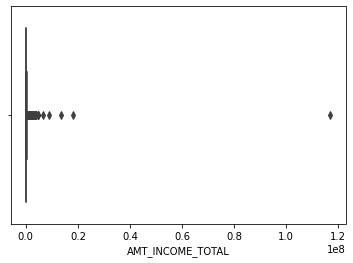

In [42]:
sns.boxplot(application_data.AMT_INCOME_TOTAL)
plt.show()

In [43]:
Q3=application_data.AMT_INCOME_TOTAL.quantile(0.75)
Q1=application_data.AMT_INCOME_TOTAL.quantile(0.25)
Q3,Q1

(202500.0, 112500.0)

In [44]:
IQR=Q3-Q1
IQR

90000.0

In [45]:
limit_upper=Q3+1.5*IQR
limit_upper

337500.0

In [46]:
application_data=application_data[~(application_data["AMT_INCOME_TOTAL"] >=10000000.0)]

In [47]:
application_data=application_data[~(application_data["AMT_INCOME_TOTAL"] >=500000)]

In [48]:
application_data["AMT_INCOME_TOTAL"].describe()

count    304806.000000
mean     163329.848243
std       78321.995593
min       25650.000000
25%      112500.000000
50%      144000.000000
75%      202500.000000
max      499500.000000
Name: AMT_INCOME_TOTAL, dtype: float64

<AxesSubplot:xlabel='AMT_INCOME_TOTAL'>

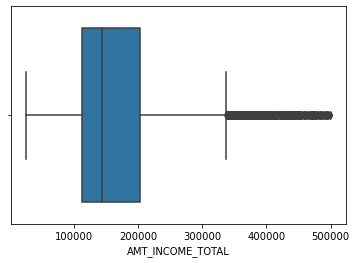

In [49]:
sns.boxplot(application_data.AMT_INCOME_TOTAL)

In [50]:
#AMT_CREDIT
application_data.AMT_CREDIT.describe()

count    3.048060e+05
mean     5.943748e+05
std      3.972891e+05
min      4.500000e+04
25%      2.700000e+05
50%      5.096025e+05
75%      8.086500e+05
max      4.050000e+06
Name: AMT_CREDIT, dtype: float64

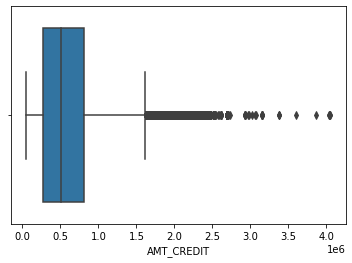

In [51]:
sns.boxplot(application_data.AMT_CREDIT)
plt.show()

In [52]:
application_data=application_data[~(application_data["AMT_CREDIT"] >=2000000)]

<AxesSubplot:xlabel='AMT_CREDIT'>

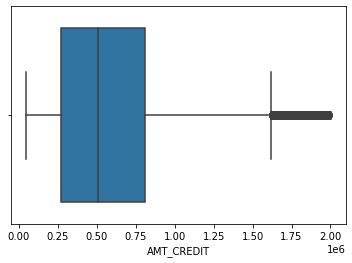

In [53]:
sns.boxplot(application_data.AMT_CREDIT)

In [54]:
#AMT_ANNUITY
application_data.AMT_ANNUITY.describe()

count    303061.000000
mean      26667.891489
std       13767.536275
min        1615.500000
25%       16452.000000
50%       24714.000000
75%       34110.000000
max      180000.000000
Name: AMT_ANNUITY, dtype: float64

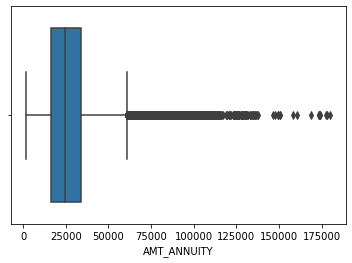

In [55]:
sns.boxplot(application_data.AMT_ANNUITY)
plt.show()

In [56]:
application_data=application_data[~(application_data["AMT_ANNUITY"] >=130000)]

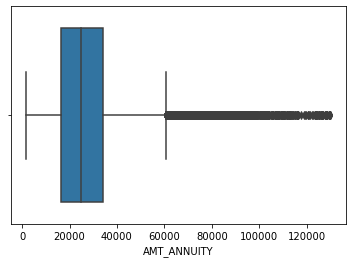

In [57]:
sns.boxplot(application_data.AMT_ANNUITY)
plt.show()

In [58]:
#AMT_GOODS_PRICE
application_data.AMT_GOODS_PRICE.describe()

count    3.030150e+05
mean     5.249838e+05
std      3.456554e+05
min      4.050000e+04
25%      2.385000e+05
50%      4.500000e+05
75%      6.795000e+05
max      1.998000e+06
Name: AMT_GOODS_PRICE, dtype: float64

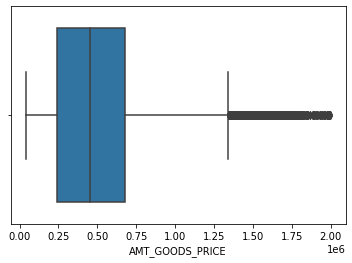

In [59]:
sns.boxplot(application_data.AMT_GOODS_PRICE)
plt.show()

In [60]:
#REGION_POPULATION_RELATIVE
application_data.REGION_POPULATION_RELATIVE.describe()


count    303015.000000
mean          0.020717
std           0.013613
min           0.000290
25%           0.010006
50%           0.018850
75%           0.028663
max           0.072508
Name: REGION_POPULATION_RELATIVE, dtype: float64

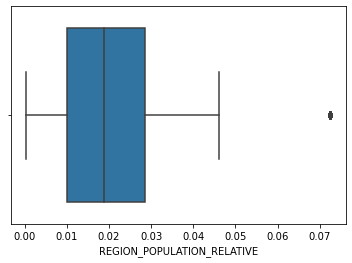

In [61]:
sns.boxplot(application_data.REGION_POPULATION_RELATIVE)
plt.show()

In [62]:
application_data.DAYS_BIRTH.describe()

count    303015.000000
mean      16037.422035
std        4373.546936
min        7489.000000
25%       12400.500000
50%       15749.000000
75%       19694.000000
max       25201.000000
Name: DAYS_BIRTH, dtype: float64

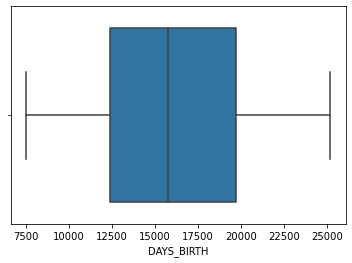

In [63]:
sns.boxplot(application_data.DAYS_BIRTH)
plt.show()

In [64]:
#EXT_source_2 and EXT_SOURCE_3
application_data.EXT_SOURCE_2.describe()

count    3.030150e+05
mean     5.130199e-01
std      1.909514e-01
min      8.173617e-08
25%      3.908214e-01
50%      5.638868e-01
75%      6.622685e-01
max      8.549997e-01
Name: EXT_SOURCE_2, dtype: float64

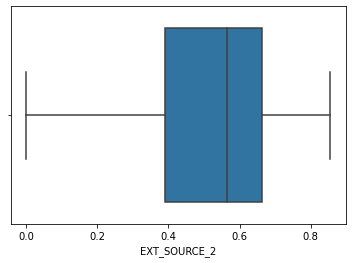

In [65]:
sns.boxplot(application_data.EXT_SOURCE_2)
plt.show()

In [66]:
application_data.EXT_SOURCE_3.describe()

count    303015.000000
mean          0.510892
std           0.174447
min           0.000527
25%           0.417100
50%           0.510852
75%           0.636376
max           0.896010
Name: EXT_SOURCE_3, dtype: float64

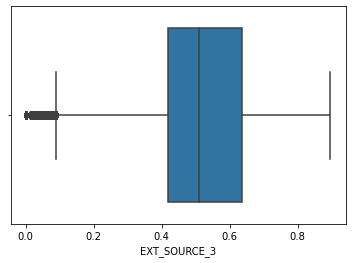

In [67]:
sns.boxplot(application_data.EXT_SOURCE_3)
plt.show()

In [68]:
#combining values from EXT_SOURCE_2 and EXT_SOURCE_2 into a single column
application_data["EXT_SOURCE_TOTAL"]=application_data.EXT_SOURCE_3+application_data.EXT_SOURCE_2

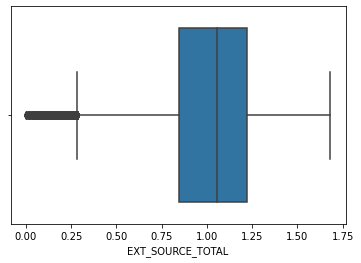

In [69]:
sns.boxplot(application_data["EXT_SOURCE_TOTAL"])
plt.show()

### Binning
Organising values in the AMT_INCOME_TOTAL, AMT_CREDIT, DAYS_BIRTH column

In [70]:
#AMT_INCOME_TOTAL
bins = [0,200000,400000,10000000000]
slot = ['Low','Medium','High']
application_data['AMT_INCOME_RANGE']=pd.cut(application_data['AMT_INCOME_TOTAL'],bins,labels=slot)

In [71]:
#AMT_CREDIT
bins = [0,350000,700000,1000000000]
slots = ['Low','Medium','High']

application_data['AMT_CREDIT_RANGE']=pd.cut(application_data['AMT_CREDIT'],bins=bins,labels=slots)

In [72]:
#DAYS_BIRTH
application_data['DAYS_BIRTH']= (application_data['DAYS_BIRTH']/365).astype(int)
application_data['DAYS_BIRTH_BINS']=pd.cut(application_data['DAYS_BIRTH'], bins=[19,25,35,60,100], labels=['Teen','Adult', 'Middle Age', 'Senior Citizen'])

### Dividing variables into Continuous and Categorical

In [73]:
Cont = ["AMT_INCOME_TOTAL","AMT_CREDIT","AMT_ANNUITY","AMT_GOODS_PRICE","REGION_POPULATION_RELATIVE","age","workex","registration_change","ID_change","EXT_SOURCE_TOTAL","PHONE_CHANGE"]
Catg = ["NAME_CONTRACT_TYPE","CODE_GENDER","NAME_INCOME_TYPE","NAME_EDUCATION_TYPE","NAME_FAMILY_STATUS","NAME_HOUSING_TYPE","OCCUPATION_TYPE","ORGANIZATION_TYPE"]

### Treating Outliers

AMT_INCOME_TOTAL


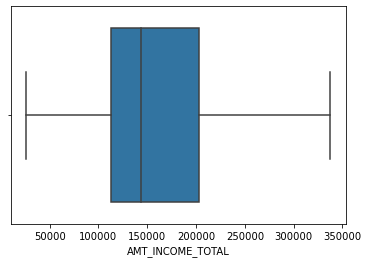

AMT_CREDIT


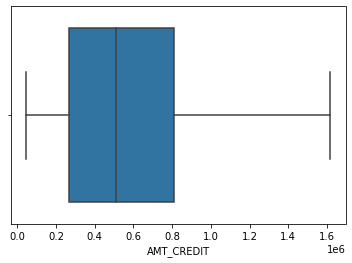

AMT_ANNUITY


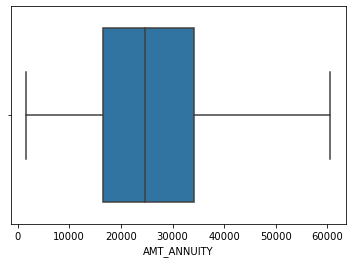

AMT_GOODS_PRICE


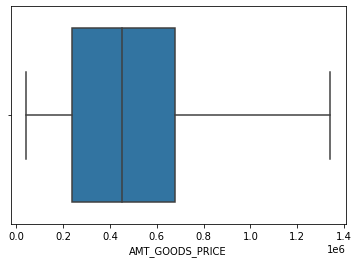

REGION_POPULATION_RELATIVE


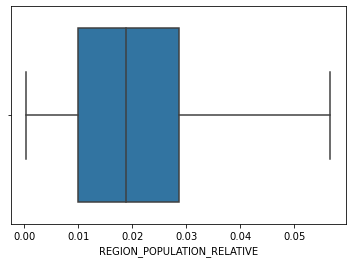

age


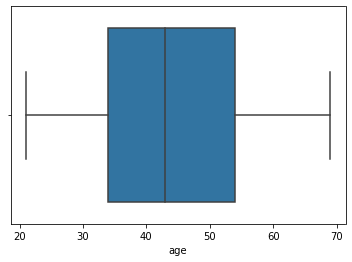

workex


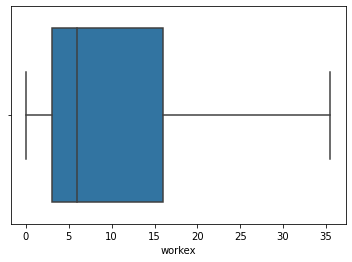

registration_change


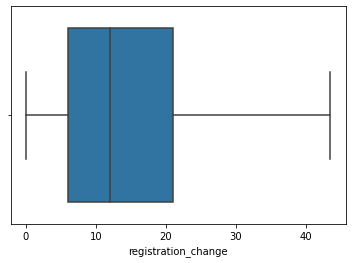

ID_change


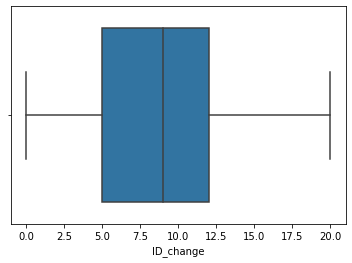

EXT_SOURCE_TOTAL


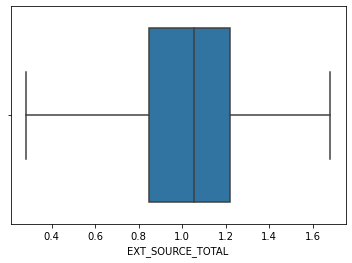

PHONE_CHANGE


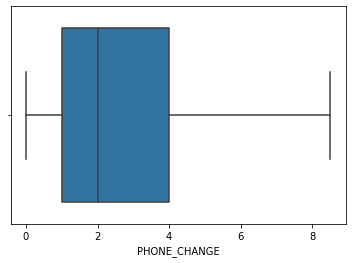

In [74]:
for i in Cont:
    q1=application_data[i].quantile(0.25)
    q3=application_data[i].quantile(0.75)
    IQR=q3-q1
    lower=q1-1.5*IQR
    upper=q3+1.5*IQR
    application_data[i]=np.where(application_data[i]>upper,upper,application_data[i])
    application_data[i]=np.where(application_data[i]<lower,lower,application_data[i])
    
    print(i)
    sns.boxplot(application_data[i])
    plt.show()

## Analysis (on application_data) 

In [75]:
#Observing Data Imbalance
application_data.TARGET.value_counts()

0    278395
1     24620
Name: TARGET, dtype: int64

In [76]:
#percentage each value in 0 and 1
100*application_data.TARGET.value_counts(normalize  = True)

0    91.87499
1     8.12501
Name: TARGET, dtype: float64

<AxesSubplot:>

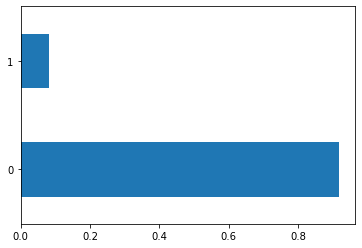

In [77]:
application_data.TARGET.value_counts(normalize  = True).plot.barh()

### Segmented Analysis
Diving the Target column values into two- defaulter for 1 and non defaulter for 0

In [78]:
defaulter=application_data[inp0.TARGET==1]
non_defaulter=application_data[application_data.TARGET==0]

<AxesSubplot:title={'center':'Not_Defaulter'}, xlabel='AMT_INCOME_TOTAL', ylabel='Density'>

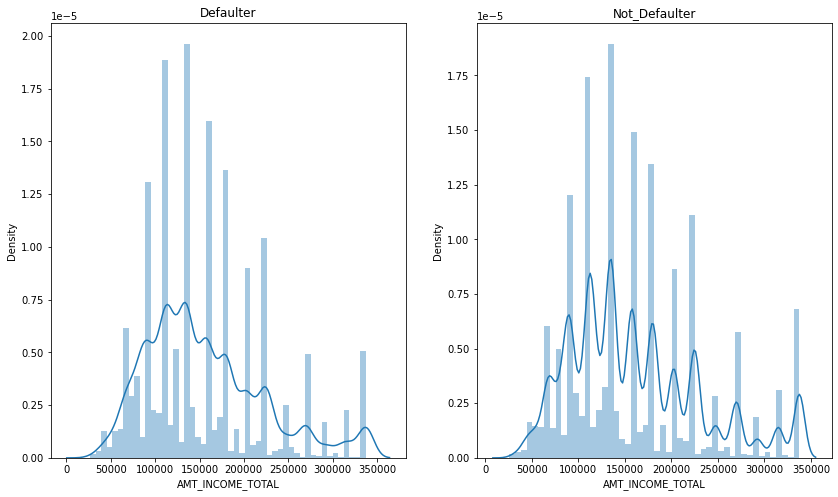

In [79]:
# plotting defaulter and non defaulter against AMT_INCOME_TOTAL
plt.figure(figsize=[14,8])
plt.subplot(1,2,1)
plt.title("Defaulter")
sns.distplot(defaulter["AMT_INCOME_TOTAL"])

plt.subplot(1,2,2)
plt.title("Not_Defaulter")
sns.distplot(non_defaulter["AMT_INCOME_TOTAL"])

<AxesSubplot:title={'center':'Not_Defaulter'}, xlabel='AMT_CREDIT', ylabel='Density'>

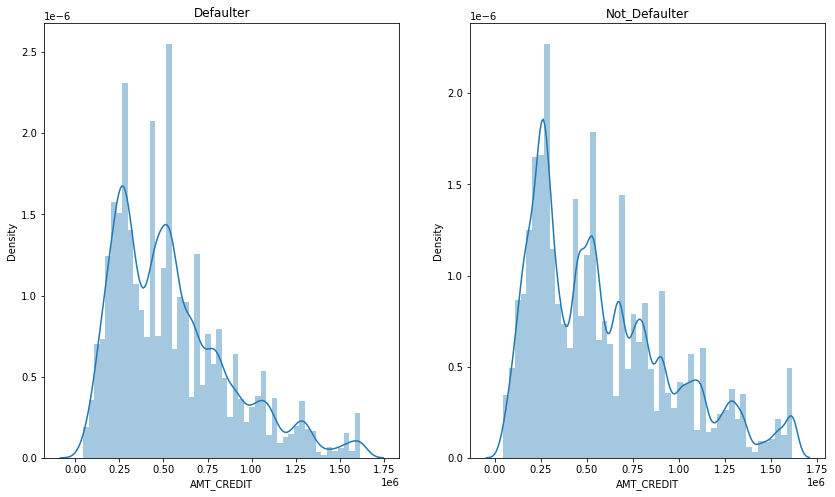

In [80]:
# plotting defaulter and non defaulter against AMT_CREDIT
plt.figure(figsize=[14,8])
plt.subplot(1,2,1)
plt.title("Defaulter")
sns.distplot(defaulter["AMT_CREDIT"])

plt.subplot(1,2,2)
plt.title("Not_Defaulter")
sns.distplot(non_defaulter["AMT_CREDIT"])

In [81]:
# plotting defaulter and non defaulter against NAME_INCOME_TYPE
defaulter.groupby(by="NAME_INCOME_TYPE")["TARGET"].count()

NAME_INCOME_TYPE
Commercial associate     5256
Maternity leave             2
Pensioner                2975
State servant            1236
Unemployed                  8
Working                 15143
Name: TARGET, dtype: int64

<AxesSubplot:ylabel='NAME_INCOME_TYPE'>

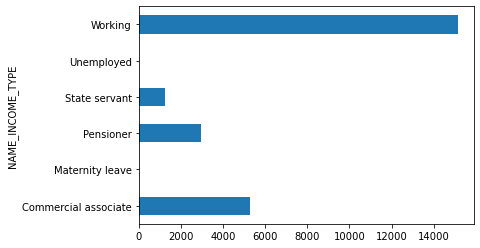

In [82]:
defaulter.groupby(by="NAME_INCOME_TYPE")["TARGET"].count().plot.barh()

In [83]:
# plotting defaulter and non defaulter against NAME_EDUCATION_TYPE
inp0.groupby(by="NAME_EDUCATION_TYPE")["TARGET"].sum()

NAME_EDUCATION_TYPE
Academic degree                      3
Higher education                  4009
Incomplete higher                  872
Lower secondary                    417
Secondary / secondary special    19524
Name: TARGET, dtype: int64

<AxesSubplot:ylabel='NAME_EDUCATION_TYPE'>

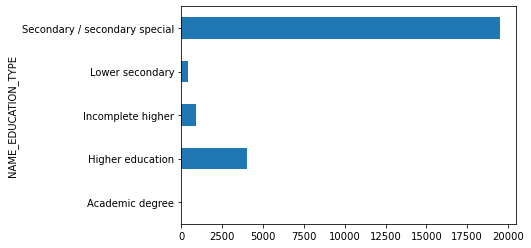

In [84]:
inp0.groupby(by="NAME_EDUCATION_TYPE")["TARGET"].sum().plot.barh()

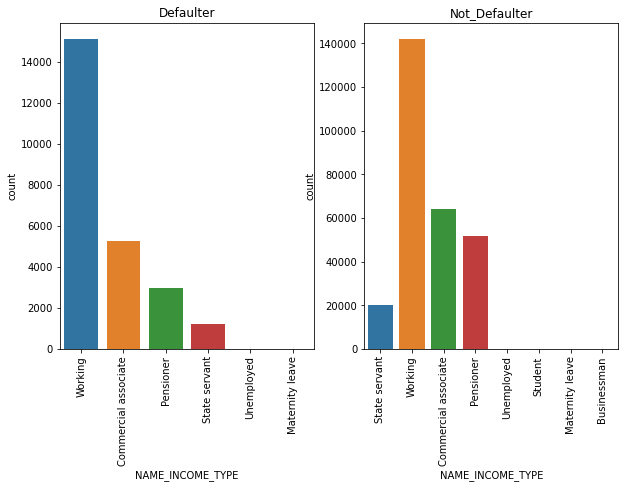

In [85]:
# plotting defaulter and non defaulter against NAME_INCOME_TYPE
plt.figure(figsize=[10,6])
plt.subplot(1,2,1)
plt.title("Defaulter")
plt.xticks(rotation=90)
sns.countplot(defaulter["NAME_INCOME_TYPE"])

plt.subplot(1,2,2)
plt.title("Not_Defaulter")
plt.xticks(rotation=90)
sns.countplot(non_defaulter["NAME_INCOME_TYPE"])
plt.show()

<AxesSubplot:ylabel='NAME_INCOME_TYPE'>

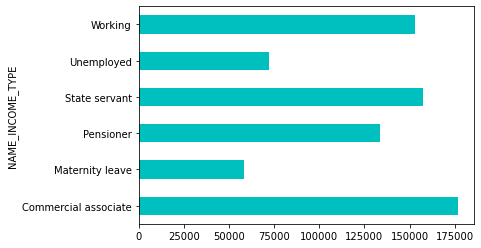

In [86]:
# plotting AMT_INCOME_TOTAL against NAME_INCOME_TYPE
defaulter.groupby(by="NAME_INCOME_TYPE")["AMT_INCOME_TOTAL"].mean().plot.barh(color="c")

### Characteristics of a defaulting client

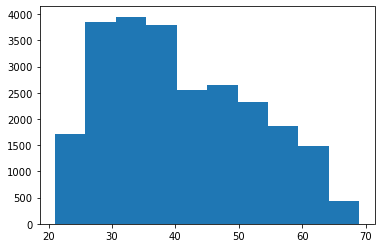

In [87]:
#Age
plt.hist(defaulter["age"])
plt.show()

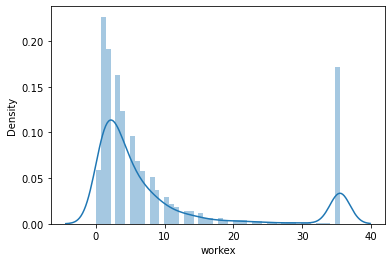

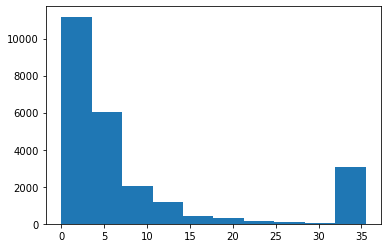

In [88]:
#Work Experience
sns.distplot(defaulter["workex"])
plt.show()
plt.hist(defaulter["workex"])
plt.show()

<AxesSubplot:>

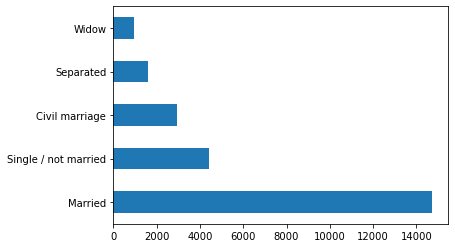

In [89]:
#Family status
defaulter["NAME_FAMILY_STATUS"].value_counts().plot.barh()

<AxesSubplot:>

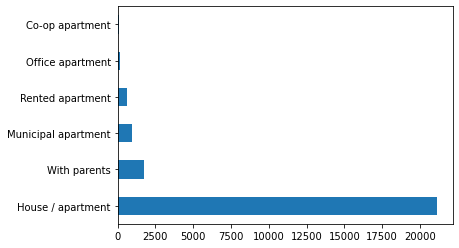

In [90]:
#Type of housing
defaulter["NAME_HOUSING_TYPE"].value_counts().plot.barh()

<AxesSubplot:>

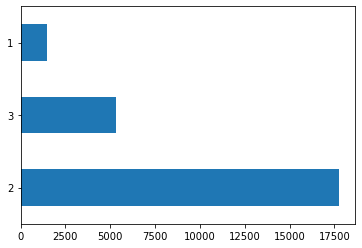

In [91]:
#Region they belong to
defaulter["REGION_RATING_CLIENT"].value_counts().plot.barh()

<AxesSubplot:>

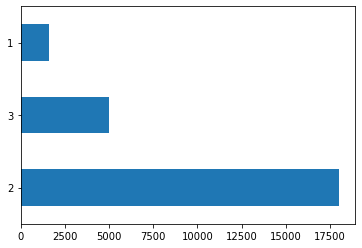

In [92]:
#Region they belong to taking city into account
defaulter["REGION_RATING_CLIENT_W_CITY"].value_counts().plot.barh()

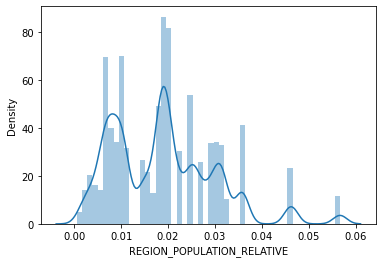

In [93]:
#Population of region where the client lives
sns.distplot(defaulter.REGION_POPULATION_RELATIVE)
plt.show()

<AxesSubplot:>

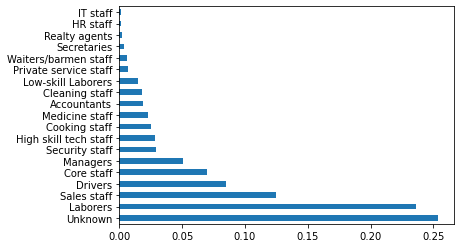

In [94]:
# Occupation type
defaulter["OCCUPATION_TYPE"].value_counts(normalize=True).plot.barh()

<AxesSubplot:>

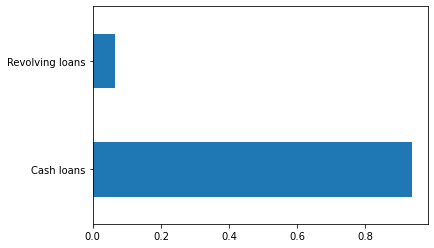

In [95]:
#Type of loan
defaulter.NAME_CONTRACT_TYPE.value_counts(normalize=True).plot.barh()

<AxesSubplot:>

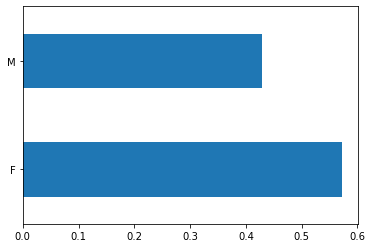

In [96]:
#Gender of the defaulter
defaulter.CODE_GENDER.value_counts(normalize=True).plot.barh()

<AxesSubplot:ylabel='TARGET'>

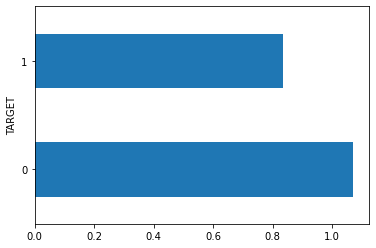

In [97]:
# Normalized External Source
application_data.groupby(by="TARGET")["EXT_SOURCE_TOTAL"].median().plot.barh()

In [98]:
#Finding numbers of defaulters in each column relevant in our analysis
for i in defaulter.columns:
    print(i,defaulter[i].nunique())

SK_ID_CURR 24620
TARGET 1
NAME_CONTRACT_TYPE 2
CODE_GENDER 2
FLAG_OWN_CAR 2
FLAG_OWN_REALTY 2
CNT_CHILDREN 9
AMT_INCOME_TOTAL 348
AMT_CREDIT 2391
AMT_ANNUITY 5873
AMT_GOODS_PRICE 341
NAME_TYPE_SUITE 7
NAME_INCOME_TYPE 6
NAME_EDUCATION_TYPE 5
NAME_FAMILY_STATUS 5
NAME_HOUSING_TYPE 6
REGION_POPULATION_RELATIVE 80
DAYS_BIRTH 48
DAYS_EMPLOYED 5374
DAYS_REGISTRATION 9902
DAYS_ID_PUBLISH 5380
FLAG_MOBIL 1
FLAG_EMP_PHONE 2
FLAG_WORK_PHONE 2
FLAG_CONT_MOBILE 2
FLAG_PHONE 2
FLAG_EMAIL 2
OCCUPATION_TYPE 19
CNT_FAM_MEMBERS 11
REGION_RATING_CLIENT 3
REGION_RATING_CLIENT_W_CITY 3
WEEKDAY_APPR_PROCESS_START 7
HOUR_APPR_PROCESS_START 24
REG_REGION_NOT_LIVE_REGION 2
REG_REGION_NOT_WORK_REGION 2
LIVE_REGION_NOT_WORK_REGION 2
REG_CITY_NOT_LIVE_CITY 2
REG_CITY_NOT_WORK_CITY 2
LIVE_CITY_NOT_WORK_CITY 2
ORGANIZATION_TYPE 58
EXT_SOURCE_2 21821
EXT_SOURCE_3 760
OBS_30_CNT_SOCIAL_CIRCLE 25
DEF_30_CNT_SOCIAL_CIRCLE 7
OBS_60_CNT_SOCIAL_CIRCLE 25
DEF_60_CNT_SOCIAL_CIRCLE 6
DAYS_LAST_PHONE_CHANGE 2954
FLAG_DOCUME

### Univariate Analysis - Continuous Variables

Text(0.5, 1.0, 'Amount of Income')

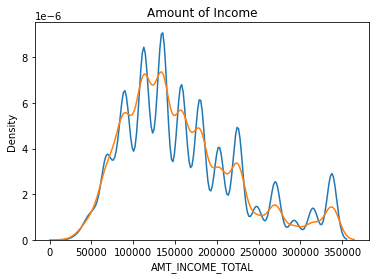

In [99]:
#AMT_INCOME_TOTAL
sns.distplot(non_defaulter['AMT_INCOME_TOTAL'], hist=False, label="Success")
sns.distplot(defaulter['AMT_INCOME_TOTAL'], hist = False, label="Fail")
plt.title('Amount of Income')

Text(0.5, 1.0, 'Loan Amount')

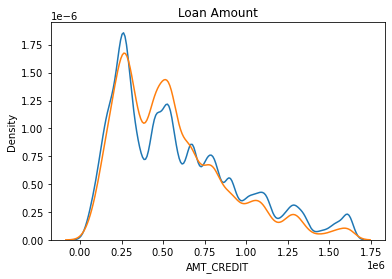

In [100]:
#AMT_CREDIT
sns.distplot(non_defaulter['AMT_CREDIT'], hist=False, label="Success")
sns.distplot(defaulter['AMT_CREDIT'], hist = False, label="Fail")
plt.title('Loan Amount')

Text(0.5, 1.0, 'Annuity Amount')

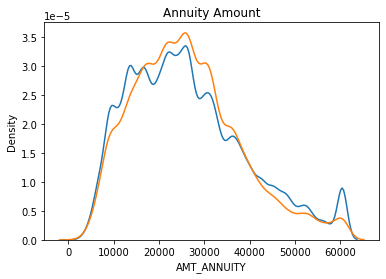

In [101]:
# AMT_ANNUITY
sns.distplot(non_defaulter['AMT_ANNUITY'], hist=False, label="Success")
sns.distplot(defaulter['AMT_ANNUITY'], hist = False, label="Fail")
plt.title('Annuity Amount')

Text(0.5, 1.0, 'Cost of Good')

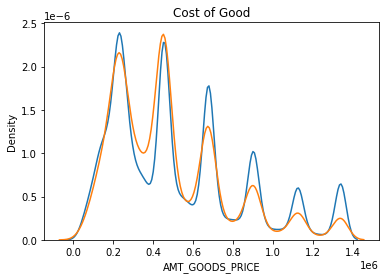

In [102]:
#AMT_GOODS_PRICE
sns.distplot(non_defaulter['AMT_GOODS_PRICE'], hist=False, label="Success")
sns.distplot(defaulter['AMT_GOODS_PRICE'], hist = False, label="Fail")
plt.title('Cost of Good')

Text(0.5, 1.0, 'age of the client')

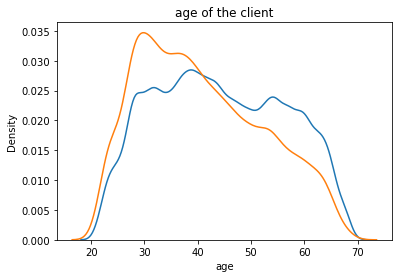

In [103]:
#Age
sns.distplot(non_defaulter['age'], hist=False, label="Success")
sns.distplot(defaulter['age'], hist = False, label="Fail")
plt.title('age of the client')

Text(0.5, 1.0, 'Work Experience')

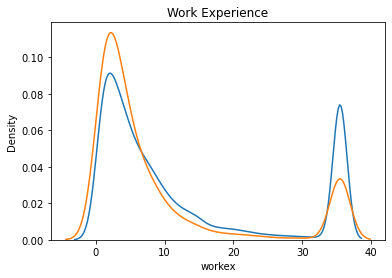

In [104]:
#Work experience
sns.distplot(non_defaulter['workex'], hist=False, label="Success")
sns.distplot(defaulter['workex'], hist = False, label="Fail")
plt.title('Work Experience')

### Univariate Analysis - Categorical Variables

In [105]:
#Catg = ["NAME_CONTRACT_TYPE","CODE_GENDER","NAME_INCOME_TYPE","NAME_EDUCATION_TYPE","NAME_FAMILY_STATUS","NAME_HOUSING_TYPE","OCCUPATION_TYPE","ORGANIZATION_TYPE"]

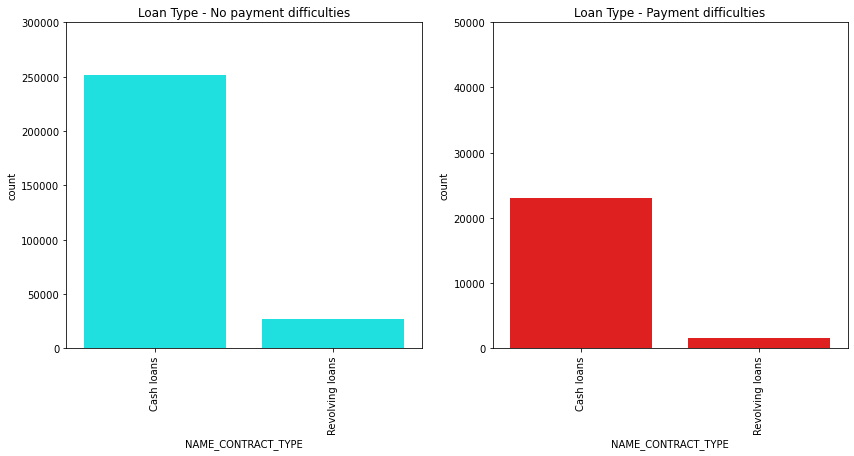

In [106]:
#Contract type
plt.figure(figsize = (14,6))

plt.subplot(1, 2, 1)
sns.countplot(non_defaulter['NAME_CONTRACT_TYPE'],color="cyan")
plt.title('Loan Type - No payment difficulties')
plt.ylim(0,300000)
plt.xticks(rotation = 90)

plt.subplot(1, 2, 2)
sns.countplot(defaulter['NAME_CONTRACT_TYPE'],color="red")
plt.title('Loan Type - Payment difficulties')
plt.ylim(0,50000)
plt.xticks(rotation = 90)
plt.show()

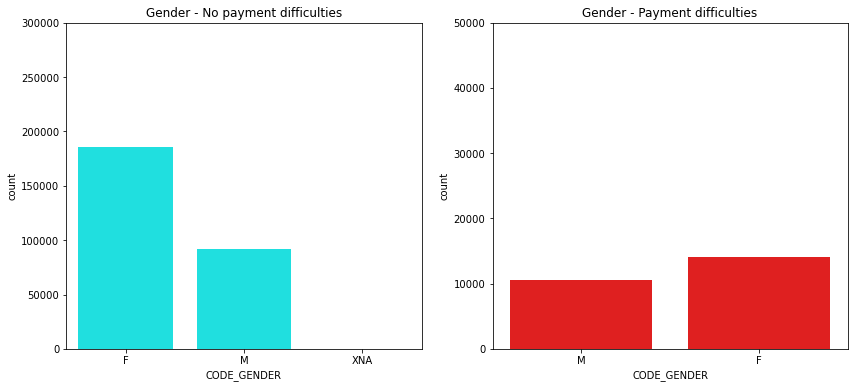

In [107]:
#Client Gender
plt.figure(figsize = (14,6))

plt.subplot(1, 2, 1)
sns.countplot(non_defaulter['CODE_GENDER'],color="cyan")
plt.title('Gender - No payment difficulties')
plt.ylim(0,300000)

plt.subplot(1, 2, 2)
sns.countplot(defaulter['CODE_GENDER'],color="red")
plt.title('Gender - Payment difficulties')
plt.ylim(0,50000)
plt.show()

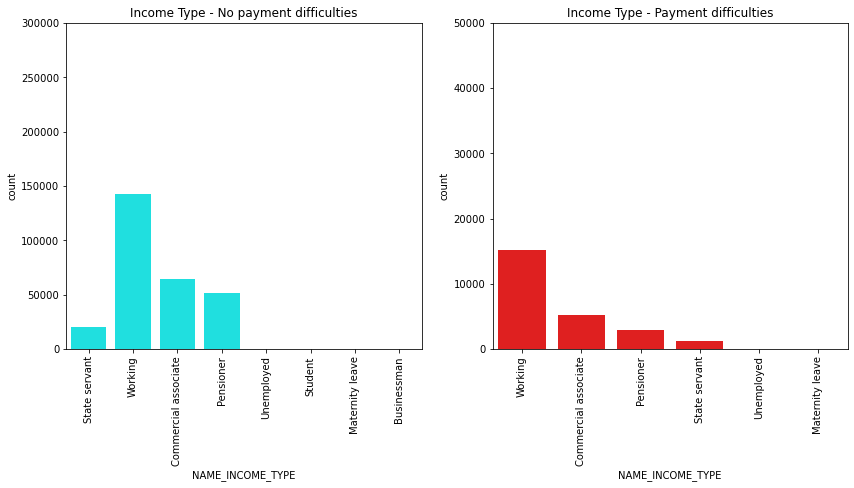

In [108]:
#Working status - Income
plt.figure(figsize = (14,6))

plt.subplot(1, 2, 1)
sns.countplot(non_defaulter['NAME_INCOME_TYPE'],color="cyan")
plt.title('Income Type - No payment difficulties')
plt.ylim(0,300000)
plt.xticks(rotation = 90)

plt.subplot(1, 2, 2)
sns.countplot(defaulter['NAME_INCOME_TYPE'],color="red")
plt.title('Income Type - Payment difficulties')
plt.ylim(0,50000)
plt.xticks(rotation = 90)
plt.show()

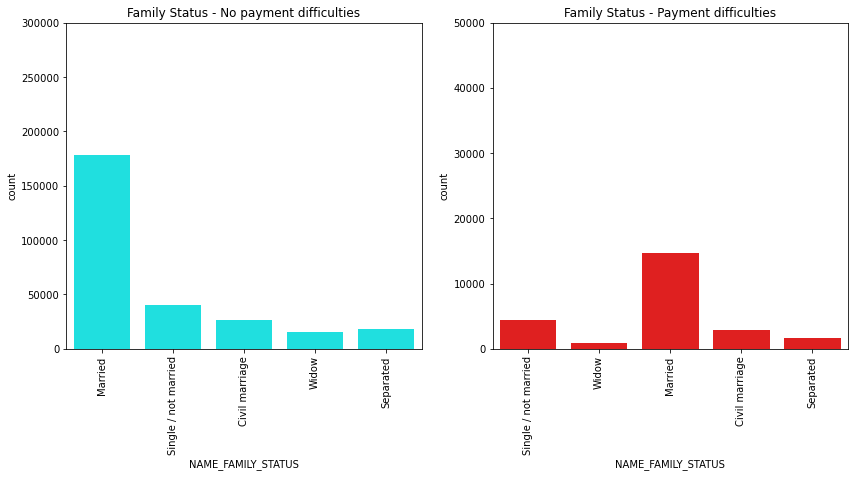

In [109]:
#Family Status
plt.figure(figsize = (14,6))

plt.subplot(1, 2, 1)
sns.countplot(non_defaulter['NAME_FAMILY_STATUS'],color="cyan")
plt.title('Family Status - No payment difficulties')
plt.ylim(0,300000)
plt.xticks(rotation = 90)


plt.subplot(1, 2, 2)
sns.countplot(defaulter['NAME_FAMILY_STATUS'],color="red")
plt.title('Family Status - Payment difficulties')
plt.ylim(0,50000)
plt.xticks(rotation = 90)
plt.show()

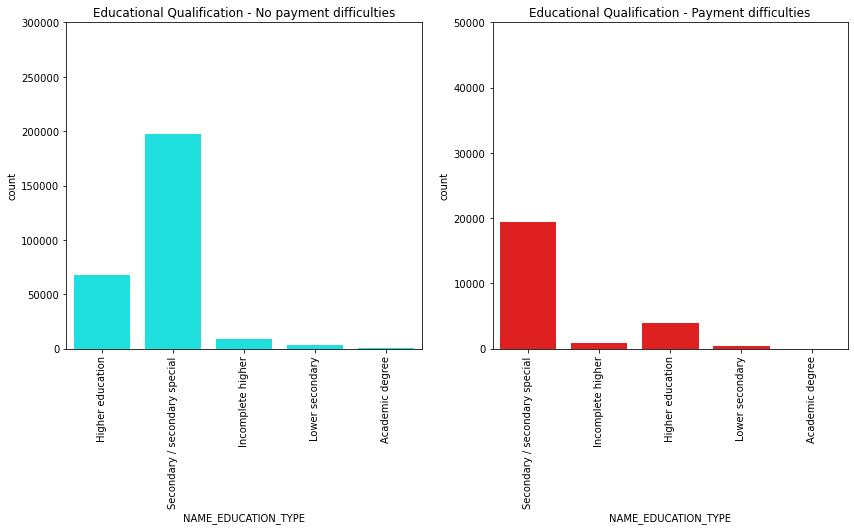

In [110]:
#Education Type
plt.figure(figsize = (14,6))

plt.subplot(1, 2, 1)
sns.countplot(non_defaulter['NAME_EDUCATION_TYPE'],color="cyan")
plt.title('Educational Qualification - No payment difficulties')
plt.ylim(0,300000)
plt.xticks(rotation = 90)

plt.subplot(1, 2, 2)
sns.countplot(defaulter['NAME_EDUCATION_TYPE'],color="red")
plt.title('Educational Qualification - Payment difficulties')
plt.ylim(0,50000)
plt.xticks(rotation = 90)
plt.show()

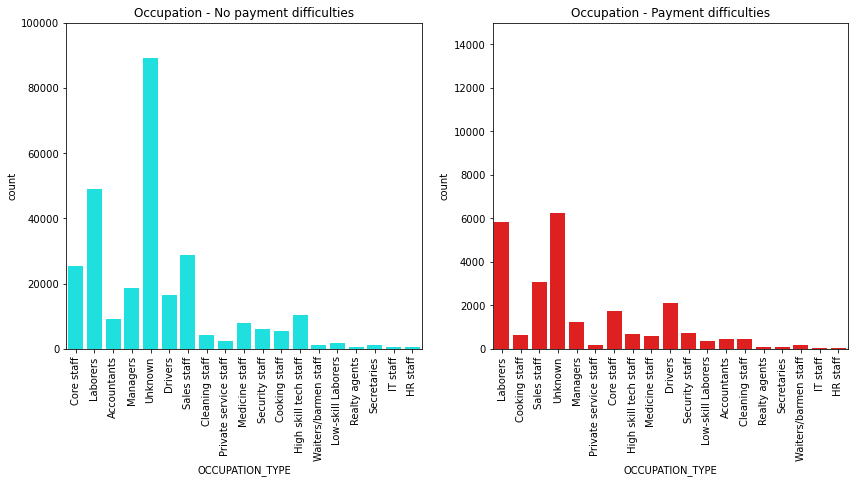

In [111]:
#Occupation
plt.figure(figsize = (14,6))

plt.subplot(1, 2, 1)
sns.countplot(non_defaulter['OCCUPATION_TYPE'],color="cyan")
plt.title('Occupation - No payment difficulties')
plt.ylim(0,100000)
plt.xticks(rotation = 90)

plt.subplot(1, 2, 2)
sns.countplot(defaulter['OCCUPATION_TYPE'],color="red")
plt.title('Occupation - Payment difficulties')
plt.ylim(0,15000)
plt.xticks(rotation = 90)
plt.show()

### Bivariate Analysis

#### Numeric-Numeric 

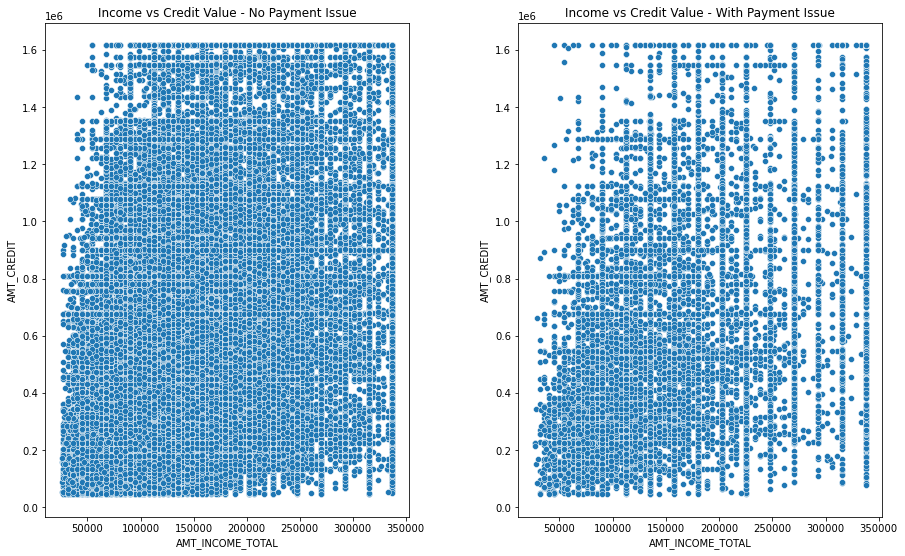

In [112]:
#Income vs Credit Value
plt.figure(figsize = (15, 20))
plt.subplots_adjust(wspace=0.3)

plt.subplot(2,2,1)
sns.scatterplot(non_defaulter.AMT_INCOME_TOTAL,non_defaulter.AMT_CREDIT)
plt.xlabel('AMT_INCOME_TOTAL')
plt.ylabel('AMT_CREDIT')
plt.title('Income vs Credit Value - No Payment Issue')

plt.subplot(2,2,2)
sns.scatterplot(defaulter.AMT_INCOME_TOTAL,defaulter.AMT_CREDIT)
plt.xlabel('AMT_INCOME_TOTAL')
plt.ylabel('AMT_CREDIT')
plt.title('Income vs Credit Value - With Payment Issue')
plt.show()

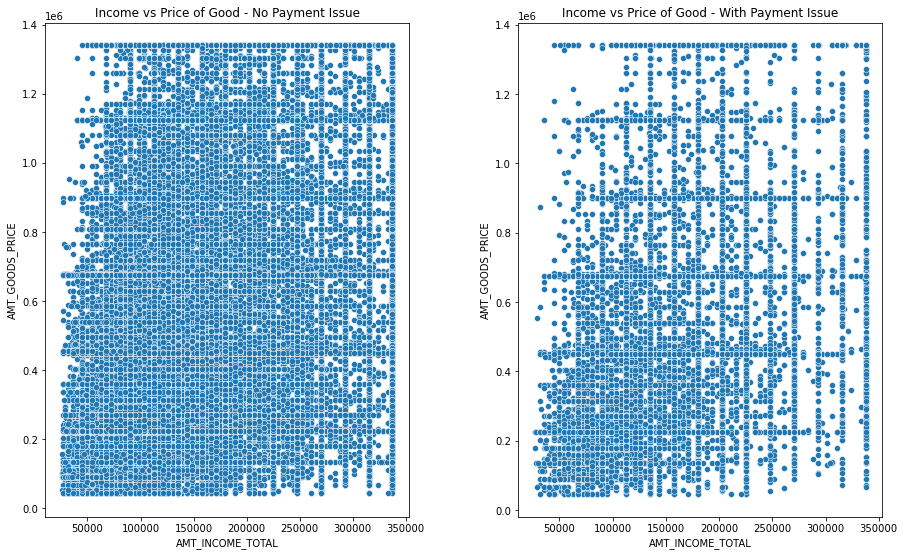

In [113]:
#Income vs Price of Good
plt.figure(figsize = (15, 20))
plt.subplots_adjust(wspace=0.3)

plt.subplot(2,2,1)
sns.scatterplot(non_defaulter.AMT_INCOME_TOTAL,non_defaulter.AMT_GOODS_PRICE)
plt.xlabel('AMT_INCOME_TOTAL')
plt.ylabel('AMT_GOODS_PRICE')
plt.title('Income vs Price of Good - No Payment Issue')

plt.subplot(2,2,2)
sns.scatterplot(defaulter.AMT_INCOME_TOTAL,defaulter.AMT_GOODS_PRICE)
plt.xlabel('AMT_INCOME_TOTAL')
plt.ylabel('AMT_GOODS_PRICE')
plt.title('Income vs Price of Good - With Payment Issue')
plt.show()

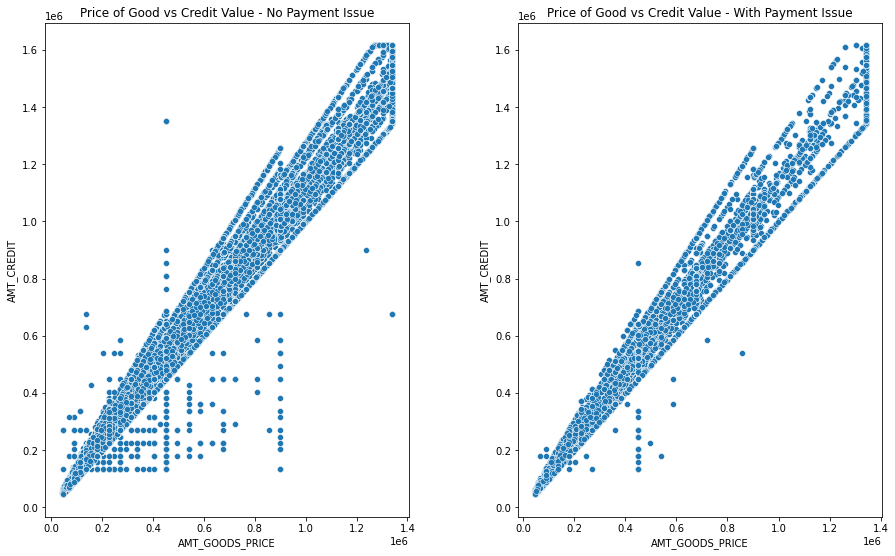

In [114]:
#Price of Good vs Credit Value
plt.figure(figsize = (15, 20))
plt.subplots_adjust(wspace=0.3)

plt.subplot(2,2,1)
sns.scatterplot(non_defaulter.AMT_GOODS_PRICE,non_defaulter.AMT_CREDIT)
plt.xlabel('AMT_GOODS_PRICE')
plt.ylabel('AMT_CREDIT')
plt.title('Price of Good vs Credit Value - No Payment Issue')

plt.subplot(2,2,2)
sns.scatterplot(defaulter.AMT_GOODS_PRICE,defaulter.AMT_CREDIT)
plt.xlabel('AMT_GOODS_PRICE')
plt.ylabel('AMT_CREDIT')
plt.title('Price of Good vs Credit Value - With Payment Issue')
plt.show()

#### Numerical - Categorical

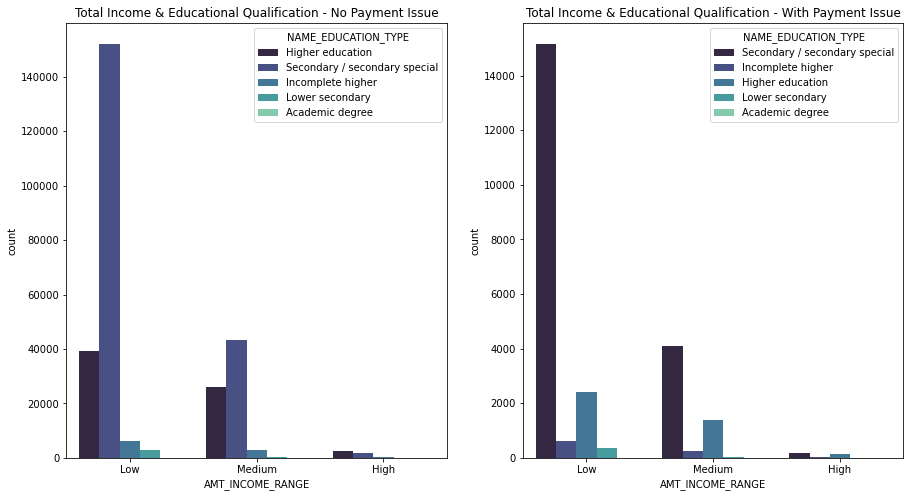

In [117]:
#Total Income vs Educational Qualification

plt.figure(figsize = (15, 8))

plt.subplot(1, 2, 1)
plt.title('Total Income & Educational Qualification - No Payment Issue')
sns.countplot(x='AMT_INCOME_RANGE', hue='NAME_EDUCATION_TYPE', data=non_defaulter, palette='mako')

plt.subplot(1, 2, 2)
plt.title('Total Income & Educational Qualification - With Payment Issue')

sns.countplot(x='AMT_INCOME_RANGE', hue='NAME_EDUCATION_TYPE', data=defaulter , palette='mako')
plt.show()

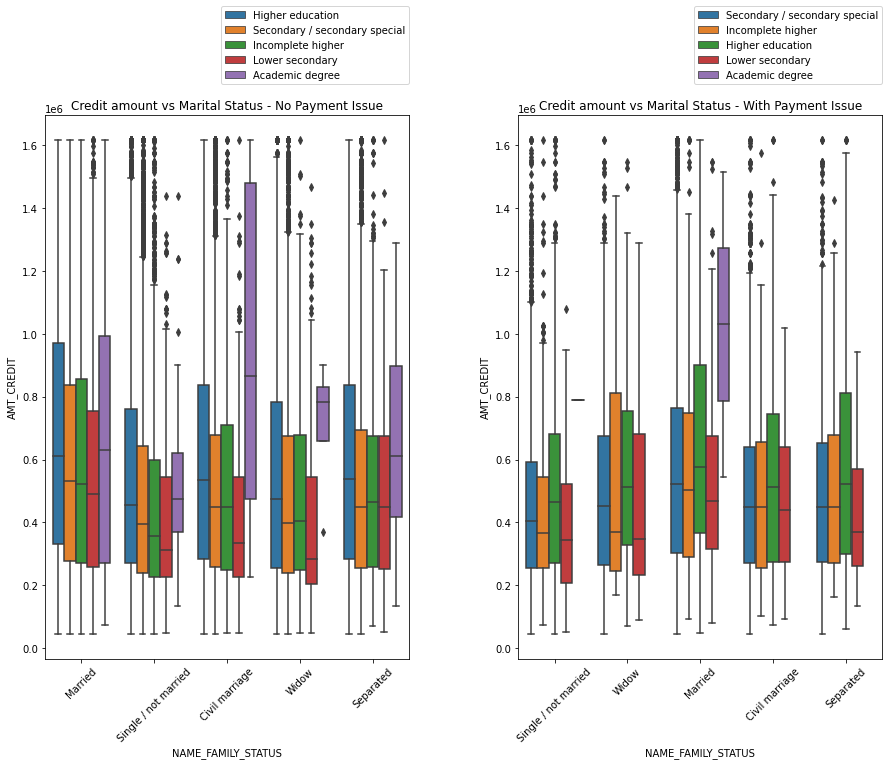

In [132]:
#Credit Value vs Marital status
plt.figure(figsize=(15,10))
plt.subplots_adjust(wspace=0.3)

plt.subplot(121)
sns.boxplot(data =non_defaulter, x='NAME_FAMILY_STATUS',y='AMT_CREDIT', hue ='NAME_EDUCATION_TYPE',orient='v]')
plt.title('Credit amount vs Marital Status - No Payment Issue')
plt.legend(bbox_to_anchor=(1, 1.2), loc='upper right', borderaxespad=0)
plt.xticks(rotation=45)

plt.subplot(122)
sns.boxplot(data =defaulter, x='NAME_FAMILY_STATUS',y='AMT_CREDIT', hue ='NAME_EDUCATION_TYPE',orient='v]')
plt.title('Credit amount vs Marital Status - With Payment Issue')
plt.legend(bbox_to_anchor=(1, 1.2), loc='upper right', borderaxespad=0)
plt.xticks(rotation=45)
plt.show()

## Analysis (on inp1)

In [133]:
inp1.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [136]:
#eliminating XNA and XAP
inp1=inp1.drop(inp1[inp1['NAME_CASH_LOAN_PURPOSE']=='XNA'].index)
inp1=inp1.drop(inp1[inp1['NAME_CASH_LOAN_PURPOSE']=='XAP'].index)

In [137]:
#Merge the previous application & application data file
merged_data= pd.merge(application_data, inp1, how='inner', on='SK_ID_CURR',suffixes='_x')
merged_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_,AMT_ANNUITY_,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,100034,0,Revolving loans,M,N,Y,0,90000.0,180000.0,9000.0,...,XNA,6.0,high,Cash Street: high,365243.0,-569.0,-419.0,-449.0,-443.0,1.0
1,100035,0,Cash loans,F,N,Y,0,292500.0,665892.0,24592.5,...,XNA,60.0,low_action,Cash Street: low,NaN,NaN,NaN,NaN,NaN,NaN
2,100039,0,Cash loans,M,Y,N,1,337500.0,733315.5,39069.0,...,XNA,42.0,low_normal,Cash Street: low,365243.0,-665.0,565.0,-455.0,-446.0,1.0
3,100046,0,Revolving loans,M,Y,Y,0,180000.0,540000.0,27000.0,...,XNA,18.0,low_normal,Cash Street: low,365243.0,-509.0,1.0,365243.0,365243.0,1.0
4,100046,0,Revolving loans,M,Y,Y,0,180000.0,540000.0,27000.0,...,XNA,24.0,low_normal,Cash Street: low,NaN,NaN,NaN,NaN,NaN,NaN


In [138]:
total_data = merged_data.rename({'NAME_CONTRACT_TYPE_' : 'NAME_CONTRACT_TYPE','AMT_CREDIT_':'AMT_CREDIT','AMT_ANNUITY_':'AMT_ANNUITY',
                         'WEEKDAY_APPR_PROCESS_START_' : 'WEEKDAY_APPR_PROCESS_START',
                         'HOUR_APPR_PROCESS_START_':'HOUR_APPR_PROCESS_START','NAME_CONTRACT_TYPEx':'NAME_CONTRACT_TYPE_PREV',
                         'AMT_CREDITx':'AMT_CREDIT_PREV','AMT_ANNUITYx':'AMT_ANNUITY_PREV',
                         'WEEKDAY_APPR_PROCESS_STARTx':'WEEKDAY_APPR_PROCESS_START_PREV',
                         'HOUR_APPR_PROCESS_STARTx':'HOUR_APPR_PROCESS_START_PREV'}, axis=1)
total_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,100034,0,Revolving loans,M,N,Y,0,90000.0,180000.0,9000.0,...,XNA,6.0,high,Cash Street: high,365243.0,-569.0,-419.0,-449.0,-443.0,1.0
1,100035,0,Cash loans,F,N,Y,0,292500.0,665892.0,24592.5,...,XNA,60.0,low_action,Cash Street: low,NaN,NaN,NaN,NaN,NaN,NaN
2,100039,0,Cash loans,M,Y,N,1,337500.0,733315.5,39069.0,...,XNA,42.0,low_normal,Cash Street: low,365243.0,-665.0,565.0,-455.0,-446.0,1.0
3,100046,0,Revolving loans,M,Y,Y,0,180000.0,540000.0,27000.0,...,XNA,18.0,low_normal,Cash Street: low,365243.0,-509.0,1.0,365243.0,365243.0,1.0
4,100046,0,Revolving loans,M,Y,Y,0,180000.0,540000.0,27000.0,...,XNA,24.0,low_normal,Cash Street: low,NaN,NaN,NaN,NaN,NaN,NaN


In [139]:
#eliminating Unwanted columns

total_data.drop(['SK_ID_CURR','WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START','REG_REGION_NOT_LIVE_REGION', 
              'REG_REGION_NOT_WORK_REGION','LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
              'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY','WEEKDAY_APPR_PROCESS_START_PREV',
              'HOUR_APPR_PROCESS_START_PREV', 'FLAG_LAST_APPL_PER_CONTRACT','NFLAG_LAST_APPL_IN_DAY'],axis=1,inplace=True)
total_data.head()

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE_,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,0,Revolving loans,M,N,Y,0,90000.0,180000.0,9000.0,180000.0,...,XNA,6.0,high,Cash Street: high,365243.0,-569.0,-419.0,-449.0,-443.0,1.0
1,0,Cash loans,F,N,Y,0,292500.0,665892.0,24592.5,477000.0,...,XNA,60.0,low_action,Cash Street: low,NaN,NaN,NaN,NaN,NaN,NaN
2,0,Cash loans,M,Y,N,1,337500.0,733315.5,39069.0,679500.0,...,XNA,42.0,low_normal,Cash Street: low,365243.0,-665.0,565.0,-455.0,-446.0,1.0
3,0,Revolving loans,M,Y,Y,0,180000.0,540000.0,27000.0,540000.0,...,XNA,18.0,low_normal,Cash Street: low,365243.0,-509.0,1.0,365243.0,365243.0,1.0
4,0,Revolving loans,M,Y,Y,0,180000.0,540000.0,27000.0,540000.0,...,XNA,24.0,low_normal,Cash Street: low,NaN,NaN,NaN,NaN,NaN,NaN


### Univariate Analysis

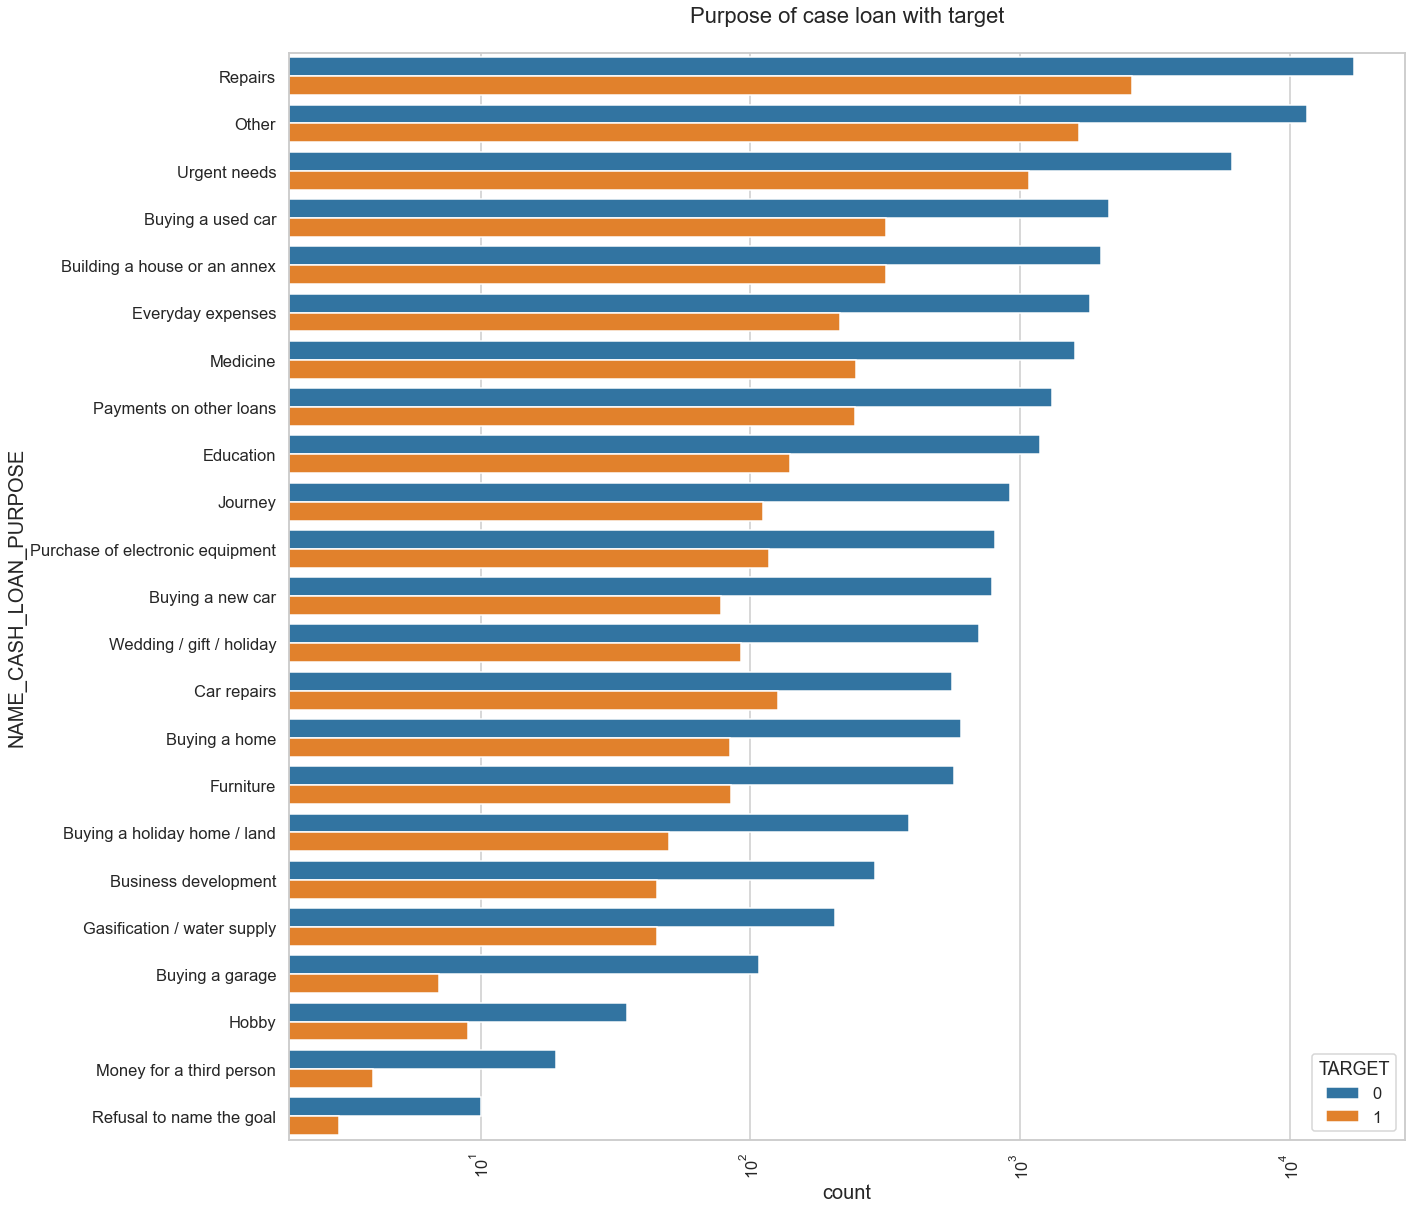

In [141]:
# Distribution of contract status
sns.set_style('whitegrid')
sns.set_context('talk')

plt.figure(figsize=(20,20))
plt.rcParams["axes.labelsize"] = 20
plt.rcParams['axes.titlesize'] = 22
plt.rcParams['axes.titlepad'] = 30
plt.xticks(rotation=90)
plt.xscale('log')
plt.title('Purpose of case loan with target')
ax = sns.countplot(data = total_data, y= 'NAME_CASH_LOAN_PURPOSE', order=total_data['NAME_CASH_LOAN_PURPOSE'].value_counts().index,hue = 'TARGET')

### Bivariate Analysis

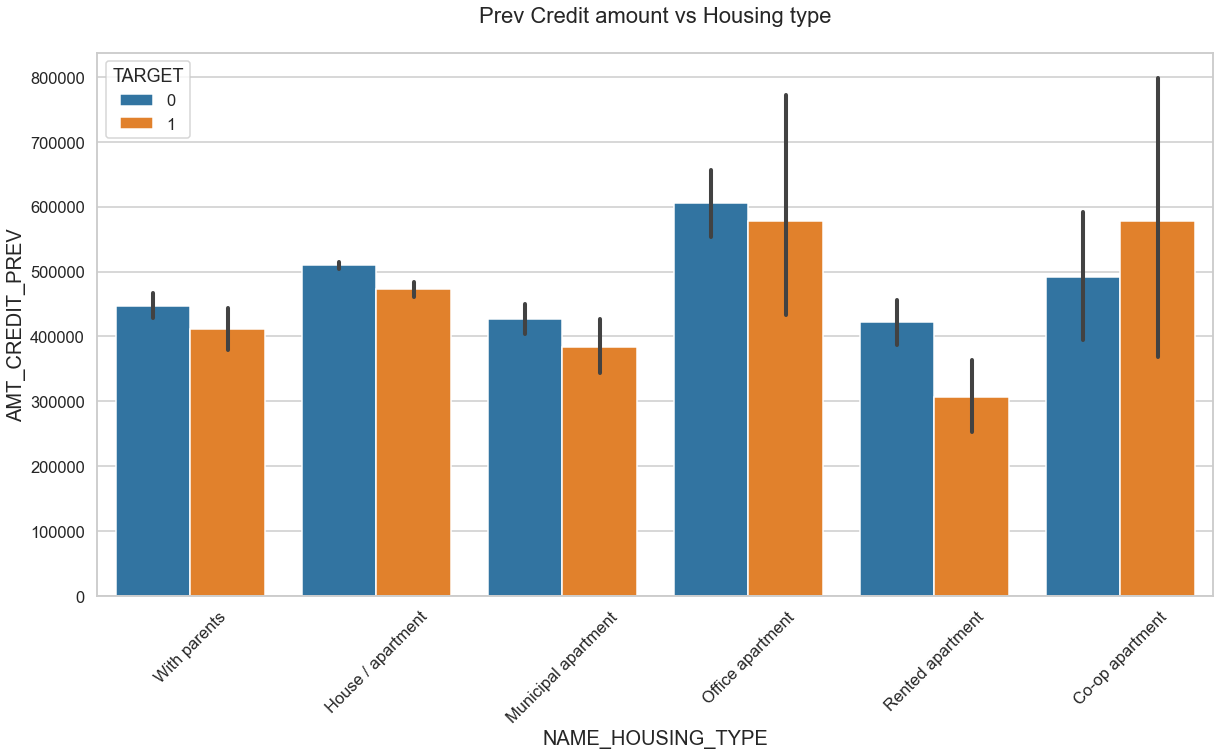

In [142]:
plt.figure(figsize=(20,10))
plt.xticks(rotation=45)
sns.barplot(data =total_data, y='AMT_CREDIT_PREV',hue='TARGET',x='NAME_HOUSING_TYPE',)
plt.title('Prev Credit amount vs Housing type')
plt.show()

## Finding Correlations

In [144]:
cor = non_defaulter.corr().abs()
cor = cor.unstack().sort_values(kind="quicksort")
cor = cor.dropna()
cor = cor[cor != 1.0]

print(cor)

DAYS_BIRTH           FLAG_DOCUMENT_10       0.000001
FLAG_DOCUMENT_10     DAYS_BIRTH             0.000001
                     FLAG_DOCUMENT_12       0.000010
FLAG_DOCUMENT_12     FLAG_DOCUMENT_10       0.000010
                     FLAG_DOCUMENT_2        0.000011
                                              ...   
age                  DAYS_BIRTH             0.999130
registration_change  DAYS_REGISTRATION      0.999301
DAYS_REGISTRATION    registration_change    0.999301
FLAG_EMP_PHONE       DAYS_EMPLOYED          0.999768
DAYS_EMPLOYED        FLAG_EMP_PHONE         0.999768
Length: 3906, dtype: float64


### Defaulter Correlation Heatmap

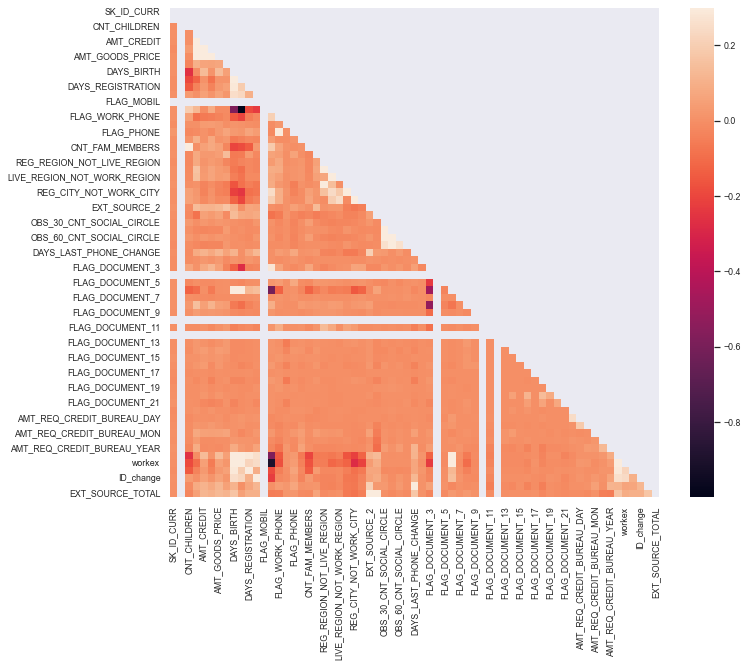

In [160]:
corr = defaulter.corr()
mask = np.zeros_like(corr)
sns.set(font_scale=.8)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(11, 9))
with sns.axes_style("white"):
    ax = sns.heatmap(corr, mask=mask, vmax=.3, square=True)

### Correlation Matrix

In [147]:
cor1=non_defaulter.corr()
cor1

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,age,workex,registration_change,ID_change,PHONE_CHANGE,EXT_SOURCE_TOTAL
SK_ID_CURR,1.000000,NaN,-0.000372,0.001857,-0.001116,0.000750,-0.000718,0.000128,0.001246,0.001740,...,0.002268,0.000122,0.000998,0.003770,0.001270,0.001615,0.001240,0.000123,0.001185,0.001455
TARGET,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CNT_CHILDREN,-0.000372,NaN,1.000000,0.030174,0.002151,0.021664,-0.001599,-0.024885,-0.337894,-0.246362,...,-0.000276,-0.008125,-0.004254,-0.036031,-0.337822,-0.245446,-0.186316,0.028081,0.008753,-0.035719
AMT_INCOME_TOTAL,0.001857,NaN,0.030174,1.000000,0.392067,0.472370,0.395848,0.158763,-0.088432,-0.184019,...,0.012407,0.073592,0.029446,0.070444,-0.088445,-0.149058,-0.077233,-0.032602,0.062998,0.065218
AMT_CREDIT,-0.001116,NaN,0.002151,0.392067,1.000000,0.785133,0.985190,0.075775,0.050097,-0.068132,...,0.001837,0.052765,0.024753,-0.026969,0.050198,-0.024260,-0.008607,0.001280,0.077971,0.105516
AMT_ANNUITY,0.000750,NaN,0.021664,0.472370,0.785133,1.000000,0.788174,0.093776,-0.015835,-0.109476,...,0.013966,0.035216,0.014200,0.002253,-0.015769,-0.076391,-0.038194,-0.017103,0.069732,0.097336
AMT_GOODS_PRICE,-0.000718,NaN,-0.001599,0.395848,0.985190,0.788174,1.000000,0.080133,0.048237,-0.066789,...,0.001838,0.054423,0.025299,-0.028634,0.048332,-0.022321,-0.010487,0.003158,0.080974,0.112029
REGION_POPULATION_RELATIVE,0.000128,NaN,-0.024885,0.158763,0.075775,0.093776,0.080133,1.000000,0.027258,-0.006780,...,-0.003664,0.068919,-0.000721,0.004234,0.027102,-0.009018,0.049545,0.004335,0.043447,0.129760
DAYS_BIRTH,0.001246,NaN,-0.337894,-0.088432,0.050097,-0.015835,0.048237,0.027258,1.000000,0.628377,...,0.003696,0.001987,0.015289,0.072834,0.999130,0.676697,0.333562,0.273427,0.075258,0.170622
DAYS_EMPLOYED,0.001740,NaN,-0.246362,-0.184019,-0.068132,-0.109476,-0.066789,-0.006780,0.628377,1.000000,...,0.001930,-0.032117,0.013253,0.045915,0.628165,0.895363,0.214740,0.277932,-0.023865,0.046523


In [150]:
#defaulter
cor2=defaulter.corr()
cor2

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,age,workex,registration_change,ID_change,PHONE_CHANGE,EXT_SOURCE_TOTAL
SK_ID_CURR,1.000000,NaN,-0.005496,0.001647,-0.003403,-0.010580,-0.003880,0.004538,0.001889,-0.004818,...,-0.003577,0.004897,-0.001798,0.007251,0.002001,-0.004452,-0.005504,0.002478,-0.001167,0.002002
TARGET,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CNT_CHILDREN,-0.005496,NaN,1.000000,-0.003411,0.000104,0.032583,-0.006280,-0.030447,-0.260417,-0.193616,...,-0.008570,-0.008663,-0.012565,-0.026497,-0.260127,-0.188150,-0.149270,0.031538,-0.011400,-0.025299
AMT_INCOME_TOTAL,0.001647,NaN,-0.003411,1.000000,0.345406,0.427408,0.347138,0.100771,-0.005738,-0.123301,...,0.019141,0.074878,0.034653,0.089792,-0.005569,-0.099601,-0.038977,0.004284,0.083276,0.047988
AMT_CREDIT,-0.003403,NaN,0.000104,0.345406,1.000000,0.755150,0.981403,0.062760,0.137011,0.006412,...,0.011492,0.053006,-0.004929,-0.013583,0.137330,0.048450,0.028296,0.052836,0.110165,0.121845
AMT_ANNUITY,-0.010580,NaN,0.032583,0.427408,0.755150,1.000000,0.755341,0.058788,0.011104,-0.083024,...,0.030361,0.048243,-0.006495,-0.004718,0.011362,-0.055516,-0.035583,0.014311,0.078597,0.102135
AMT_GOODS_PRICE,-0.003880,NaN,-0.006280,0.347138,0.981403,0.755341,1.000000,0.071182,0.138461,0.011232,...,0.011556,0.056254,-0.003685,-0.014586,0.138666,0.055683,0.028918,0.057067,0.118689,0.130507
REGION_POPULATION_RELATIVE,0.004538,NaN,-0.030447,0.100771,0.062760,0.058788,0.071182,1.000000,0.047695,0.013977,...,0.001256,0.065673,-0.003674,0.004417,0.048055,0.019337,0.051835,0.017650,0.054417,0.114797
DAYS_BIRTH,0.001889,NaN,-0.260417,-0.005738,0.137011,0.011104,0.138461,0.047695,1.000000,0.584288,...,0.008772,0.009410,0.022606,0.084289,0.999056,0.628172,0.288954,0.253377,0.110877,0.166413
DAYS_EMPLOYED,-0.004818,NaN,-0.193616,-0.123301,0.006412,-0.083024,0.011232,0.013977,0.584288,1.000000,...,0.012782,-0.022551,0.012426,0.030421,0.583598,0.909051,0.192585,0.228582,0.001560,0.054530


In [155]:
cor_1=defaulter.corr().abs()
cor_2=cor_1.unstack()

heat=cor_2[(cor_2.sort_values()>0.75)  & (cor_2!=1)]
x=heat.sort_values(ascending=False)

In [157]:
top_cor=x.reset_index()
top_cor=top_cor.rename(columns={"level_0": "Col_1","level_1":"Col_2",0:"Corr"})
top_cor

,Col_1,Col_2,Corr
0,DAYS_EMPLOYED,FLAG_EMP_PHONE,0.999705
1,FLAG_EMP_PHONE,DAYS_EMPLOYED,0.999705
2,DAYS_REGISTRATION,registration_change,0.999319
3,registration_change,DAYS_REGISTRATION,0.999319
4,age,DAYS_BIRTH,0.999056
5,DAYS_BIRTH,age,0.999056
6,OBS_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,0.998274
7,OBS_60_CNT_SOCIAL_CIRCLE,OBS_30_CNT_SOCIAL_CIRCLE,0.998274
8,DAYS_ID_PUBLISH,ID_change,0.997651
9,ID_change,DAYS_ID_PUBLISH,0.997651
